# Women in Data Science Dataset

**Dataset:** Women in Data Science (91,713 encounters)  
**Microskill:** Model Comparison  
**Date:** February 13, 2025  
**Authors:** Jeremy Balch & Mackenzie Meni

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")


# Load data and analyze available columns

In [10]:
data = pd.read_csv('../training_v2.csv')

# Display the first few rows of the dataset
data.head()


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [11]:
print(data.columns.tolist())


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

# Choose the columns of interest

In [ ]:
print(data.columns.tolist())

cols_to_keep = [
 # Patient identifiers
 'patient_id',
 
 # Demographics
 'age','gender','ethnicity', 

 # Clinical Information
 'elective_surgery','bmi', 'apache_4a_hospital_death_prob',

 # Medical History
 'aids','cirrhosis','diabetes_mellitus','hepatic_failure', 
 'immunosuppression','leukemia','lymphoma', 'solid_tumor_with_metastasis',
 
 # Hospital Admission
 'readmission_status','hospital_death'
]


# # Modifying to increase our chances for bias lol
# cols_to_keep = [
#     # **Demographics**
#     'age', 'bmi', 'gender', 'ethnicity',

#     # **Clinical Admission Info**
#     'hospital_admit_source', 'icu_admit_source', 'icu_type', 'pre_icu_los_days',
#     'elective_surgery', 'apache_4a_hospital_death_prob',

#     # **Physiological Measures (Vitals)**
#     'heart_rate_apache', 'resprate_apache', 'wbc_apache', 'sodium_apache',
#     'map_apache', 'pao2_apache', 'ph_apache',

#     # **Laboratory Data**
#     'bilirubin_apache', 'glucose_apache', 'creatinine_apache', 'hematocrit_apache',
#     'albumin_apache', 'urineoutput_apache',

#     # **Apache Scores & Diagnosis**
#     'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_2_bodysystem', 'apache_3j_bodysystem',

#     # **Comorbidities**
#     'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
#     'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',

#     # **Outcome**
#     'hospital_death'
# ]


# Keep only the columns we are interested in and reassign it to the data variable
data = data[cols_to_keep]

# Display the first few rows of the dataset
data.head()


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

,age,bmi,gender,ethnicity,hospital_admit_source,icu_admit_source,icu_type,pre_icu_los_days,elective_surgery,apache_4a_hospital_death_prob,...,apache_3j_bodysystem,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,68.0,22.73,M,Caucasian,Floor,Floor,CTICU,0.541667,0,0.10,...,Sepsis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,77.0,27.42,F,Caucasian,Floor,Floor,Med-Surg ICU,0.927778,0,0.47,...,Respiratory,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,25.0,31.95,F,Caucasian,Emergency Department,Accident & Emergency,Med-Surg ICU,0.000694,0,0.00,...,Metabolic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,81.0,22.64,F,Caucasian,Operating Room,Operating Room / Recovery,CTICU,0.000694,1,0.04,...,Cardiovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,19.0,NaN,M,Caucasian,NaN,Accident & Emergency,Med-Surg ICU,0.073611,0,NaN,...,Trauma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
# Get the unique values in the 'ethnicity' column
ethnicity_values = data['ethnicity'].unique()
print("Unique values in 'ethnicity' column:", ethnicity_values)


Unique values in 'ethnicity' column: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


## Converting age and bmi columns into categorical values

Converting age and BMI into categories helps simplify data analysis and improve model interpretability. It reduces noise, making patterns clearer (e.g., "patients aged 50-59 have higher risk" instead of analyzing every individual age). Categorical bins also work better for certain statistical tests and models like decision trees, and they help handle missing values more effectively.

- Binning age into Decades (0-9, 10-19, ..., 80-89)
- Binning bmi into Ranges (10-14, 15-19, ..., >45)

In [14]:
# Function to convert the age and bmi columns to categorical because 
def convert_age_bmi_to_categorical(data):
  
    
    # Create bins and labels for Age
    age_bins = range(0, 91, 10)  # 0-10, 10-20, ... , 90-100
    age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  # "0-9", "10-19", ...
    
    # Bin Age
    data['age_cat'] = pd.cut(
        data['age'], 
        bins=age_bins, 
        labels=age_labels, 
        right=False
    )
    
    # Create bins and labels for BMI
    bmi_bins = list(range(10, 46, 5)) + [float('inf')]  # 0-5, 5-10, ... , 40-45, >45
    bmi_labels = [f"{i}-{i+4}" for i in range(10, 45, 5)] + ['>45']  # "0-4", "5-9", ..., "40-44", ">45"
    
    # Bin BMI
    data['bmi_cat'] = pd.cut(
        data['bmi'], 
        bins=bmi_bins, 
        labels=bmi_labels, 
        right=False
    )
    # return the modified data
    return data


In [ ]:
# Apply the function to the data to convert age and bmi to categorical and display the first few rows
data = convert_age_bmi_to_categorical(data)

data.head()

,age,bmi,gender,ethnicity,hospital_admit_source,icu_admit_source,icu_type,pre_icu_los_days,elective_surgery,apache_4a_hospital_death_prob,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,age_cat,bmi_cat
0,68.0,22.73,M,Caucasian,Floor,Floor,CTICU,0.541667,0,0.10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,60-69,20-24
1,77.0,27.42,F,Caucasian,Floor,Floor,Med-Surg ICU,0.927778,0,0.47,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,70-79,25-29
2,25.0,31.95,F,Caucasian,Emergency Department,Accident & Emergency,Med-Surg ICU,0.000694,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20-29,30-34
3,81.0,22.64,F,Caucasian,Operating Room,Operating Room / Recovery,CTICU,0.000694,1,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80-89,20-24
4,19.0,NaN,M,Caucasian,NaN,Accident & Emergency,Med-Surg ICU,0.073611,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10-19,NaN


## Converting categorical variables into numerical one-hot encoded columns

Since machine learning models work best with numbers, pd.get_dummies() converts categorical variables into separate 0/1 columns. This avoids misinterpretation of category relationships and ensures models can properly use features like gender, ethnicity, and age groups without assuming a numerical order.

In [ ]:
# converts the categorical columns to one-hot encoded variables
data_dummies = pd.get_dummies(data, columns=['gender', 'ethnicity', 'age_cat', 'bmi_cat'])


# Displays the types of the columns in the data_dummies DataFrame
data_dummies.dtypes

# Displays the shape of the data_dummies DataFrame
data_dummies.shape



(91713, 59)

## Handling NaN Values

In [17]:
# Check for NaN values in the data
nan_values = data_dummies.isna().sum()

# Print the number of NaN values in each column
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 age                               4228
bmi                               3429
hospital_admit_source            21409
icu_admit_source                   112
icu_type                             0
pre_icu_los_days                     0
elective_surgery                     0
apache_4a_hospital_death_prob     7947
heart_rate_apache                  878
resprate_apache                   1234
wbc_apache                       22012
sodium_apache                    18600
map_apache                         994
pao2_apache                      70868
ph_apache                        70868
bilirubin_apache                 58134
glucose_apache                   11036
creatinine_apache                18853
hematocrit_apache                19878
albumin_apache                   54379
urineoutput_apache               48998
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_2_bodysystem               1662
apache_3j_bodysystem              16

# Dropping the rows with NaN values and saving the preprocessed data for model exploration later

In [18]:
# Drop rows with NaN values
data_dropnan = data_dummies.dropna()

# Print the number of NaN values in each column after dropping rows with NaN values
print(data_dropnan.isnull().sum())

data_dropnan.shape

# Save the preprocessed data to a CSV file
data_dropnan.to_csv('../preprocessed_data.csv')

age                              0
bmi                              0
hospital_admit_source            0
icu_admit_source                 0
icu_type                         0
pre_icu_los_days                 0
elective_surgery                 0
apache_4a_hospital_death_prob    0
heart_rate_apache                0
resprate_apache                  0
wbc_apache                       0
sodium_apache                    0
map_apache                       0
pao2_apache                      0
ph_apache                        0
bilirubin_apache                 0
glucose_apache                   0
creatinine_apache                0
hematocrit_apache                0
albumin_apache                   0
urineoutput_apache               0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_2_bodysystem              0
apache_3j_bodysystem             0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure     

# What TableOne Does
* Generates a summary table of key statistics (mean, median, standard deviation, counts, etc.).
* Groups data by categorical variables (e.g., case vs. control, male vs. female).
* Displays p-values to compare groups statistically.
* Formats output for research publications.

In [19]:
# Generate Table One
# Example usage of the tableone library to create Table One

from tableone import TableOne

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9', 'age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24', 'bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44',
    'bmi_cat_>45',

    # Demographics
    'gender_F','gender_M', 'ethnicity_African American','ethnicity_Asian','ethnicity_Caucasian',
    'ethnicity_Hispanic','ethnicity_Native American','ethnicity_Other/Unknown',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma', 
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1 = TableOne(
    data_dropnan, 
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
print(table1)

# Save the table to a location you're exploring in
# table1.to_csv('/path/to/file/save.csv')

                                                    Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                       2294           1774            520        
age_cat_0-9, n (%)                            False                             2294 (100.0)   1774 (100.0)    520 (100.0)   1.000
age_cat_10-19, n (%)                          False                              2285 (99.6)    1768 (99.7)     517 (99.4)   0.433
                                              True                                   9 (0.4)        6 (0.3)        3 (0.6)        
age_cat_20-29, n (%)                          False                              2187 (95.3)    1676 (94.5)     511 (98.3)  <0.001
                                              True                                 

## Exploring relationships in our data
A correlation matrix helps identify relationships between categorical variables, revealing redundant features, potential biases, and hidden patterns in the data. This is useful for feature selection, fairness analysis, and improving model performance.

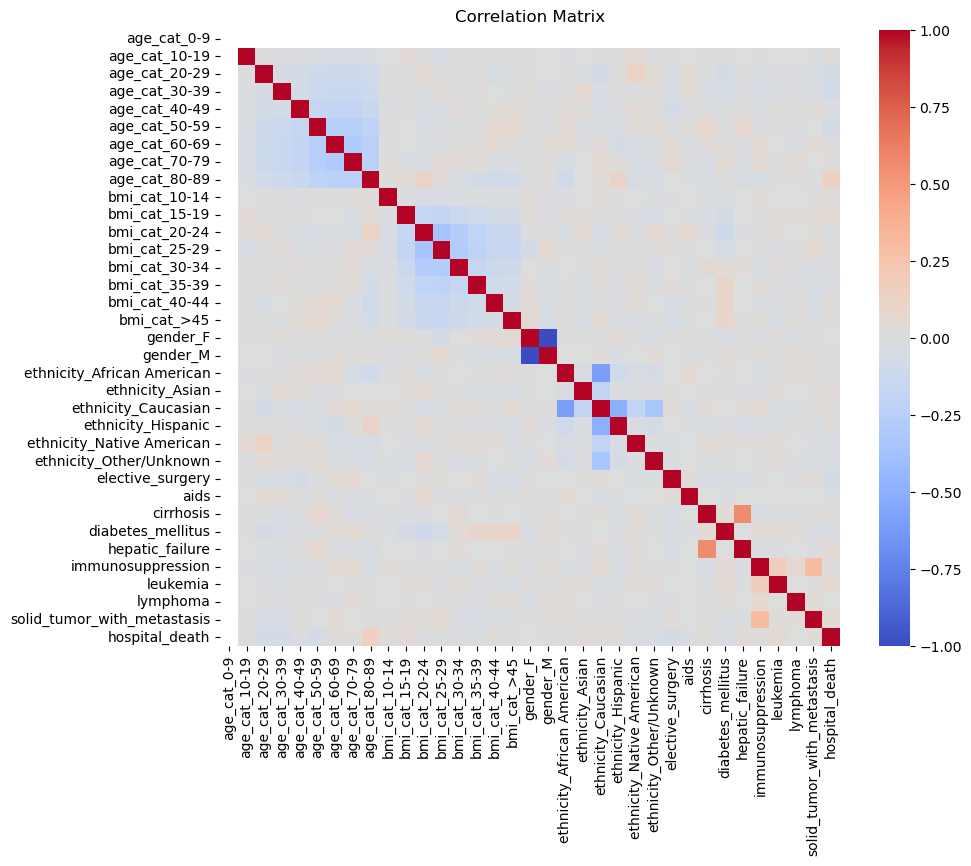

,age_cat_0-9,age_cat_10-19,age_cat_20-29,age_cat_30-39,age_cat_40-49,age_cat_50-59,age_cat_60-69,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,...,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
age_cat_0-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_cat_10-19,NaN,1.000000,-0.013882,-0.015755,-0.020130,-0.030660,-0.033852,-0.033683,-0.026898,-0.003713,...,0.000966,-0.002271,-0.008571,-0.012863,-0.007465,-0.011930,-0.006316,-0.003939,-0.009744,0.015987
age_cat_20-29,NaN,-0.013882,1.000000,-0.055528,-0.070948,-0.108058,-0.119308,-0.118712,-0.094802,-0.013085,...,-0.042785,0.049197,-0.014788,-0.060501,-0.008682,-0.030778,-0.022260,-0.013882,-0.034343,-0.075318
age_cat_30-39,NaN,-0.015755,-0.055528,1.000000,-0.080523,-0.122641,-0.135408,-0.134732,-0.107595,-0.014851,...,-0.038711,0.041993,-0.034283,-0.047284,-0.014120,-0.037658,-0.025264,-0.015755,-0.038978,-0.074192
age_cat_40-49,NaN,-0.020130,-0.070948,-0.080523,1.000000,-0.156699,-0.173012,-0.172148,-0.137475,-0.018975,...,-0.066906,-0.011607,-0.021444,-0.011597,0.012969,-0.011952,0.012854,0.003846,0.019402,-0.016143
age_cat_50-59,NaN,-0.030660,-0.108058,-0.122641,-0.156699,1.000000,-0.263507,-0.262191,-0.209382,0.008598,...,-0.014387,0.012905,0.081681,-0.013412,0.083256,-0.020569,0.006306,-0.012979,-0.002949,-0.058584
age_cat_60-69,NaN,-0.033852,-0.119308,-0.135408,-0.173012,-0.263507,1.000000,-0.289486,-0.231180,-0.014211,...,0.044025,-0.019519,0.027505,0.020767,-0.010780,0.051013,-0.001922,-0.017162,0.040119,0.004504
age_cat_70-79,NaN,-0.033683,-0.118712,-0.134732,-0.172148,-0.262191,-0.289486,1.000000,-0.230025,0.021491,...,0.062557,-0.019421,-0.034276,0.052092,-0.028153,0.051949,0.008995,0.033259,-0.000523,0.019276
age_cat_80-89,NaN,-0.026898,-0.094802,-0.107595,-0.137475,-0.209382,-0.231180,-0.230025,1.000000,0.015490,...,-0.003381,-0.015509,-0.031591,0.008310,-0.040712,-0.042097,0.005205,0.011619,-0.010959,0.138894
bmi_cat_10-14,NaN,-0.003713,-0.013085,-0.014851,-0.018975,0.008598,-0.014211,0.021491,0.015490,1.000000,...,-0.020409,-0.002141,-0.008079,-0.028819,-0.007036,0.029062,-0.005953,-0.003713,-0.009185,0.020957


In [20]:

def correlation_matrix(data):
    corr_cols = categorical_vars
    df_corr = data[corr_cols].corr()

    #Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    return df_corr

correlation_matrix(data_dropnan)

## Visualize Mortality per Ethnic Group

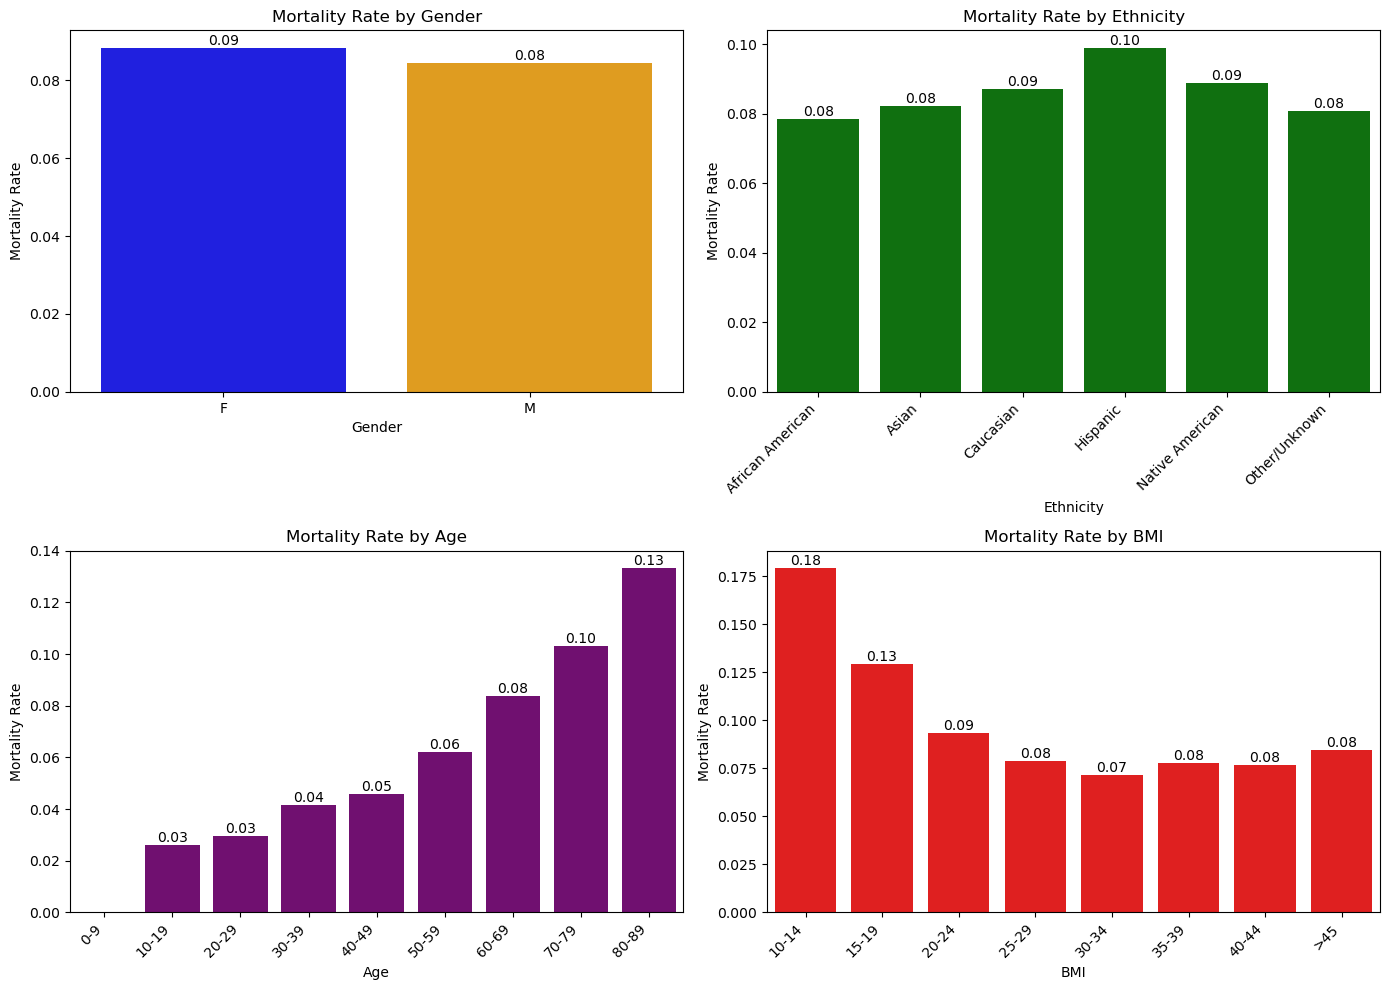

In [26]:

# Calculate mortality rates by gender
gender_mortality = data.groupby('gender')['hospital_death'].mean().reset_index()

# Calculate mortality rates by ethnicity
ethnicity_mortality = data.groupby('ethnicity')['hospital_death'].mean().reset_index()

# Calculate mortality rates by age
age_mortality = data.groupby('age_cat')['hospital_death'].mean().reset_index()

# Calculate mortality rates by bmi
bmi_mortality = data.groupby('bmi_cat')['hospital_death'].mean().reset_index()

# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(14, 10))

# Subplot 1: Mortality by Gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='hospital_death', data=gender_mortality, palette=['blue', 'orange'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)
# Add values on top of the bars
for index, value in enumerate(gender_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 2: Mortality by Ethnicity
plt.subplot(2, 2, 2)
sns.barplot(x='ethnicity', y='hospital_death', data=ethnicity_mortality, color='green')
plt.title('Mortality Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(ethnicity_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 3: Mortality by Age
plt.subplot(2, 2, 3)
sns.barplot(x='age_cat', y='hospital_death', data=age_mortality, color='purple')
plt.title('Mortality Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(age_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 4: Mortality by BMI
plt.subplot(2, 2, 4)
sns.barplot(x='bmi_cat', y='hospital_death', data=bmi_mortality, color='red')
plt.title('Mortality Rate by BMI')
plt.xlabel('BMI')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(bmi_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Change underlying distrbution of patient population


### Modifying Enthnicity

This function randomly modifies the ethnicity distribution in a dataset, ensuring that 20% of individuals are reassigned as 'African American' and the remaining 80% are randomly switched to another ethnicity. This can be used for fairness testing, bias analysis, or controlled experiments on model behavior.

In [27]:
# Create a copy of the data to alter
data_altered = data_dropnan.copy()

# Function to randomly switch 20% individuals to African American
def random_switch_ethnicity_classes_20_percent_african_american(data_altered):
    
    
    # Define the ethnicity columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    # Make a fresh copy so we don't modify the original in place
    data_altered = data_altered.copy()
    
    # Create a zero array of shape [num_rows, num_ethnicity_cols]
    arr = np.zeros((len(data_altered), len(ethnicity_cols)), dtype=int)
    
    # Generate a boolean mask with ~40% True (for African American) and ~60% False (for random other)
    mask = np.random.rand(len(data_altered)) < 0.2
    
    # For rows where mask is True, set ethnicity_African American to 1
    arr[mask, 0] = 1
    
    # For rows where mask is False, choose a random ethnicity index from [1..4]
    other_indices = np.random.randint(1, len(ethnicity_cols), size=(~mask).sum())
    arr[~mask, other_indices] = 1
    
    # Assign back into the DataFrame columns
    data_altered.loc[:, ethnicity_cols] = arr
    
    return data_altered




### Modifying Gender

In [28]:
data_altered = data_dropnan.copy()

def random_switch_gender_classes_80_percent_female(data_altered):
    
    
    # Define the ethnicity columns
    gender_cols = [
        'gender_F',
        'gender_M'
    ]
    
    # Make a fresh copy so we don't modify the original in place
    data_altered = data_altered.copy()
    
    # Create a zero array of shape [num_rows, num_ethnicity_cols]
    arr = np.zeros((len(data_altered), len(gender_cols)), dtype=int)
    
    # Generate a boolean mask with ~80% True (for African American) and ~20% False (for random other)
    mask = np.random.rand(len(data_altered)) < 0.8
    
    # For rows where mask is True, set ethnicity_African American to 1
    arr[mask, 0] = 1
    
    # For rows where mask is False, choose a random ethnicity index from [1..4]
    other_indices = np.random.randint(1, len(gender_cols), size=(~mask).sum())
    arr[~mask, other_indices] = 1
    
    # Assign back into the DataFrame columns
    data_altered.loc[:, gender_cols] = arr
    
    return data_altered




## Creating the strongly biased data sets

In [29]:
# IMPORTANT: Make sure to capture the return value

data_altered_20_percent_african_american = random_switch_ethnicity_classes_20_percent_african_american(data_altered)

data_altered_complete = random_switch_gender_classes_80_percent_female(data_altered_20_percent_african_american)

In [30]:
# Saving the altered data to a CSV file

data_altered_complete.to_csv('../data_altered_complete.csv')


## Visualization of the altered data

### Vizualizing ethnicity

This function visualizes the distribution of ethnicities in a dataset that uses one-hot encoding for ethnicity categories.

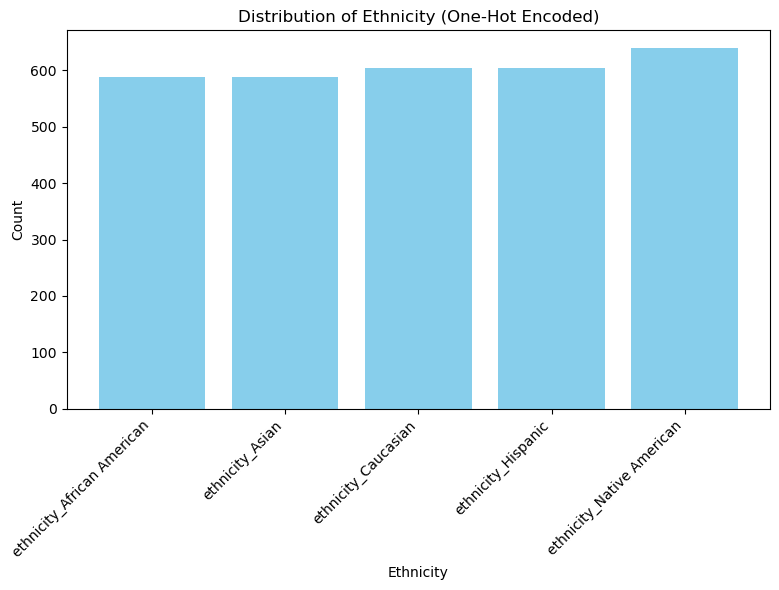

In [31]:
def plot_ethnicity_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """
    

    # Define the ethnicity one-hot columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    ethnicity_counts = data_altered_complete[ethnicity_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(ethnicity_counts.index, ethnicity_counts.values, color='skyblue')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.title('Distribution of Ethnicity (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the ethinicity distribution for the altered data
plot_ethnicity_distribution(data_altered_complete)

### Vizualizing gender

This function visualizes the distribution of gender in a dataset that uses one-hot encoding for gender categories.

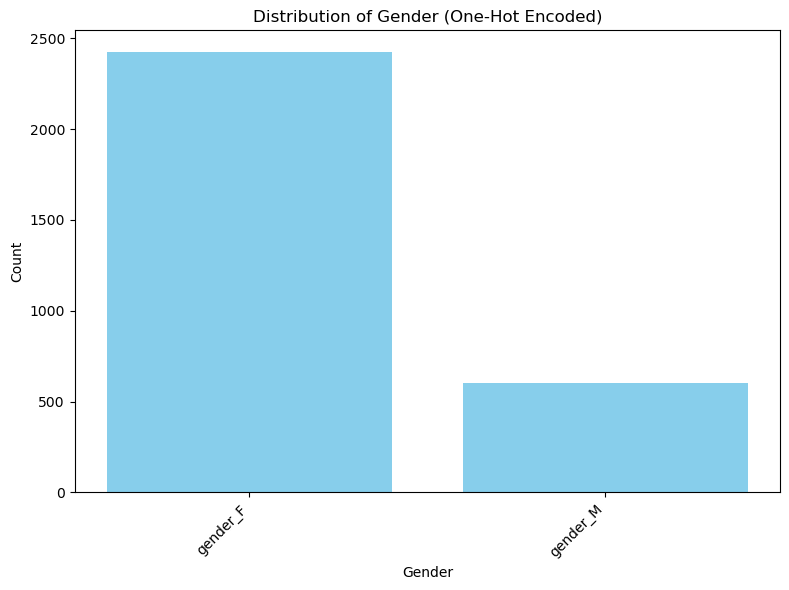

In [32]:
def plot_gender_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """

    # Define the ethnicity one-hot columns
    gender_cols = [
        'gender_F',
        'gender_M'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    gender_counts = data_altered_complete[gender_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Distribution of Gender (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the gender distribution
plot_gender_distribution(data_altered_complete)

In [33]:
# Generate Table One

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9','age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24','bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44','bmi_cat_>45',

    # Demographics
    'gender_F','gender_M','ethnicity_African American','ethnicity_Asian',
    'ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma',
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1_altered = TableOne(
    data_altered_complete,                                  # Choose the specific altered table
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
table1_altered

Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                       3025           2380            645        
age_cat_0-9, n (%)                            False                             3025 (100.0)   2380 (100.0)    645 (100.0)   1.000
age_cat_10-19, n (%)                          False                              3016 (99.7)    2374 (99.7)     642 (99.5)   0.412
                                              True                                   9 (0.3)        6 (0.3)        3 (0.5)        
age_cat_20-29, n (%)                          False                              2883 (95.3)    2249 (94.5)     634 (98.3)  <0.001
                                              True                                 142 (4.7)      131 (5.5)       11 (1.7)        
age_cat_30-39, n (%)                          False                              2856 (94.4)    2228 (93.6)     628 (97.4)  <0.001
                                              True                                 169 (5.6)      152 (6.4)       17 (2.6)        
age_cat_40-49, n (%)                          False                              2743 (90.7)    2150 (90.3)     593 (91.9)   0.244
                                              True                                 282 (9.3)      230 (9.7)       52 (8.1)        
age_cat_50-59, n (%)                          False                              2430 (80.3)    1884 (79.2)     546 (84.7)   0.002
                                              True                                595 (19.7)     496 (20.8)      99 (15.3)        
age_cat_60-69, n (%)                          False                              2336 (77.2)    1841 (77.4)     495 (76.7)   0.784
                                              True                                689 (22.8)     539 (22.6)     150 (23.3)        
age_cat_70-79, n (%)                          False                              2372 (78.4)    1877 (78.9)     495 (76.7)   0.268
                                              True                                653 (21.6)     503 (21.1)     150 (23.3)        
age_cat_80-89, n (%)                          False                              2539 (83.9)    2057 (86.4)     482 (74.7)  <0.001
                                              True                                486 (16.1)     323 (13.6)     163 (25.3)        
bmi_cat_10-14, n (%)                          False                              3010 (99.5)    2368 (99.5)     642 (99.5)   1.000
                                              True                                  15 (0.5)       12 (0.5)        3 (0.5)        
bmi_cat_15-19, n (%)                          False                              2796 (92.4)    2209 (92.8)     587 (91.0)   0.146
                                              True                                 229 (7.6)      171 (7.2)       58 (9.0)        
bmi_cat_20-24, n (%)                          False                              2281 (75.4)    1793 (75.3)     488 (75.7)   0.907
                                              True                                744 (24.6)     587 (24.7)     157 (24.3)        
bmi_cat_25-29, n (%)                          False                              2198 (72.7)    1731 (72.7)     467 (72.4)   0.908
                                              True                                827 (27.3)     649 (27.3)     178 (27.6)        
bmi_cat_30-34, n (%)                          False                              2507 (82.9)    1968 (82.7)     539 (83.6)   0.642
                                              True                                518 (17.1)     412 (17.3)     106 (16.4)        
bmi_cat_35-39, n (%)                          False                              2691 (89.0)    2107 (88.5)     584 (90.5)